In [1]:
from models.energy import energy_quantile_regression

In [5]:
from functions import get_energy

In [6]:
energydata = get_energy.get()

  0%|          | 0/260 [00:00<?, ?it/s]/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/functions/get_energy.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  energydata = pd.concat([energydata, pd.DataFrame(rawdata, columns=col_names)])
100%|██████████| 260/260 [00:30<00:00,  8.63it/s]


In [8]:
reg= energy_quantile_regression.energy_quantile_regression(energydata)

                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5067
Model:                       QuantReg   Bandwidth:                      0.6976
Method:                 Least Squares   Sparsity:                        12.00
Date:                Wed, 13 Dec 2023   No. Observations:                43579
Time:                        19:15:49   Df Residuals:                    43543
                                        Df Model:                           35
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.7965      0.175    336.370      0.000      58.454      59.139
weekday       -1.8470      0.014   -128.543      0.000      -1.875      -1.819
month_2        0.4430      0.143      3.108      0.002       0.164       0.722
month_3       -3.2282      0.139    -23.205      0.0

In [9]:
#import read csv
from pandas import read_csv

In [11]:
temp_data = read_csv('temperatures.csv')

In [13]:
temp_data=temp_data.drop(columns=['Unnamed: 0'])

In [15]:
#set date as index
temp_data['date'] = temp_data['date'].astype('datetime64[ns]')

In [17]:
temp_data.index = temp_data['date']

In [19]:
temp_data=temp_data.drop(columns=['date'])

In [35]:
temp_data.index

DatetimeIndex(['2018-12-24 00:00:00', '2018-12-24 01:00:00',
               '2018-12-24 02:00:00', '2018-12-24 03:00:00',
               '2018-12-24 04:00:00', '2018-12-24 05:00:00',
               '2018-12-24 06:00:00', '2018-12-24 07:00:00',
               '2018-12-24 08:00:00', '2018-12-24 09:00:00',
               ...
               '2023-12-11 14:00:00', '2023-12-11 15:00:00',
               '2023-12-11 16:00:00', '2023-12-11 17:00:00',
               '2023-12-11 18:00:00', '2023-12-11 19:00:00',
               '2023-12-11 20:00:00', '2023-12-11 21:00:00',
               '2023-12-11 22:00:00', '2023-12-11 23:00:00'],
              dtype='datetime64[ns]', name='date', length=43536, freq=None)

In [36]:
energydata.index

DatetimeIndex(['2018-12-24 00:00:00', '2018-12-24 01:00:00',
               '2018-12-24 02:00:00', '2018-12-24 03:00:00',
               '2018-12-24 04:00:00', '2018-12-24 05:00:00',
               '2018-12-24 06:00:00', '2018-12-24 07:00:00',
               '2018-12-24 08:00:00', '2018-12-24 09:00:00',
               ...
               '2023-12-13 09:00:00', '2023-12-13 10:00:00',
               '2023-12-13 11:00:00', '2023-12-13 12:00:00',
               '2023-12-13 13:00:00', '2023-12-13 14:00:00',
               '2023-12-13 15:00:00', '2023-12-13 16:00:00',
               '2023-12-13 17:00:00', '2023-12-13 18:00:00'],
              dtype='datetime64[ns]', name='date_time', length=43579, freq='H')

In [39]:
import pandas as pd

In [42]:
#merhe energy and temperature data on index
energydata.index = pd.to_datetime(energydata.index)
temp_data.index = pd.to_datetime(temp_data.index)
energydata = energydata.merge(temp_data, left_index=True, right_index=True)

In [43]:
energydata

,gesamt,weekday,month,hour,temperature_2m
2018-12-24 00:00:00,42.02925,0,12,0,4.815
2018-12-24 01:00:00,39.61025,0,12,1,4.665
2018-12-24 02:00:00,39.13875,0,12,2,3.915
2018-12-24 03:00:00,39.42100,0,12,3,3.365
2018-12-24 04:00:00,40.74775,0,12,4,2.965
...,...,...,...,...,...
2023-12-11 19:00:00,65.65500,0,12,19,7.165
2023-12-11 20:00:00,62.07900,0,12,20,7.115
2023-12-11 21:00:00,58.18600,0,12,21,7.115
2023-12-11 22:00:00,54.64750,0,12,22,6.715


In [44]:
energydata

,gesamt,weekday,month,hour,temperature_2m
2018-12-24 00:00:00,42.02925,0,12,0,4.815
2018-12-24 01:00:00,39.61025,0,12,1,4.665
2018-12-24 02:00:00,39.13875,0,12,2,3.915
2018-12-24 03:00:00,39.42100,0,12,3,3.365
2018-12-24 04:00:00,40.74775,0,12,4,2.965
...,...,...,...,...,...
2023-12-11 19:00:00,65.65500,0,12,19,7.165
2023-12-11 20:00:00,62.07900,0,12,20,7.115
2023-12-11 21:00:00,58.18600,0,12,21,7.115
2023-12-11 22:00:00,54.64750,0,12,22,6.715


In [45]:
reg= energy_quantile_regression.energy_quantile_regression(energydata)

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5086
Model:                       QuantReg   Bandwidth:                      0.6974
Method:                 Least Squares   Sparsity:                        11.85
Date:                Wed, 13 Dec 2023   No. Observations:                43536
Time:                        19:35:53   Df Residuals:                    43499
                                        Df Model:                           36
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             58.7856      0.173    340.410      0.000      58.447      59.124
weekday           -1.8391      0.014   -129.565      0.000      -1.867      -1.811
temperature_2m    -0.1233      0.007    -16.658      0.000      -0.138      -0.109
month_2            0.6207      0

In [46]:
reg

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975
0,2023-12-13,energy,36 hour,41.087301,49.087001,53.268227,56.015033,58.495173
1,2023-12-13,energy,40 hour,53.080017,62.568796,66.366188,70.875633,75.285596
2,2023-12-13,energy,44 hour,50.483452,58.319401,61.311589,64.262536,67.565558
3,2023-12-13,energy,60 hour,40.090986,47.214877,51.4291,54.601382,57.718923
4,2023-12-13,energy,64 hour,52.083702,60.696672,64.52706,69.461982,74.509346
5,2023-12-13,energy,68 hour,49.487138,56.447277,59.472462,62.848886,66.789308


In [47]:
from models.DAX import DAX_quantile_regression, DAX_baseline
from models.energy import energy_quantile_regression
from functions import get_energy, get_DAX, merge_submissions, check_submission
from functions.prepare_data import split_time
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_dax
from functions import naive_ensemble

daxdata = get_DAX.get()
base = DAX_baseline.DAX_baseline(daxdata)
base
quantile = DAX_quantile_regression.DAX_quantile_regression(daxdata)
df_dax = naive_ensemble.ensemble(base, quantile, 0.5, 0.5)

In [48]:
from models.DAX import DAX_quantile_regression, DAX_baseline
from models.energy import energy_quantile_regression
from functions import get_energy,get_DAX,merge_submissions,check_submission
from functions.prepare_data import split_time
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_model
from models.energy import energy_baseline

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


                         QuantReg Regression Results                          
Dep. Variable:                 gesamt   Pseudo R-squared:               0.5086
Model:                       QuantReg   Bandwidth:                      0.6974
Method:                 Least Squares   Sparsity:                        11.85
Date:                Wed, 13 Dec 2023   No. Observations:                43536
Time:                        19:43:13   Df Residuals:                    43499
                                        Df Model:                           36
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             58.7856      0.173    340.410      0.000      58.447      59.124
weekday           -1.8391      0.014   -129.565      0.000      -1.867      -1.811
temperature_2m    -0.1233      0.007    -16.658      0.000      -0.138      -0.109
month_2            0.6207      0

/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldc

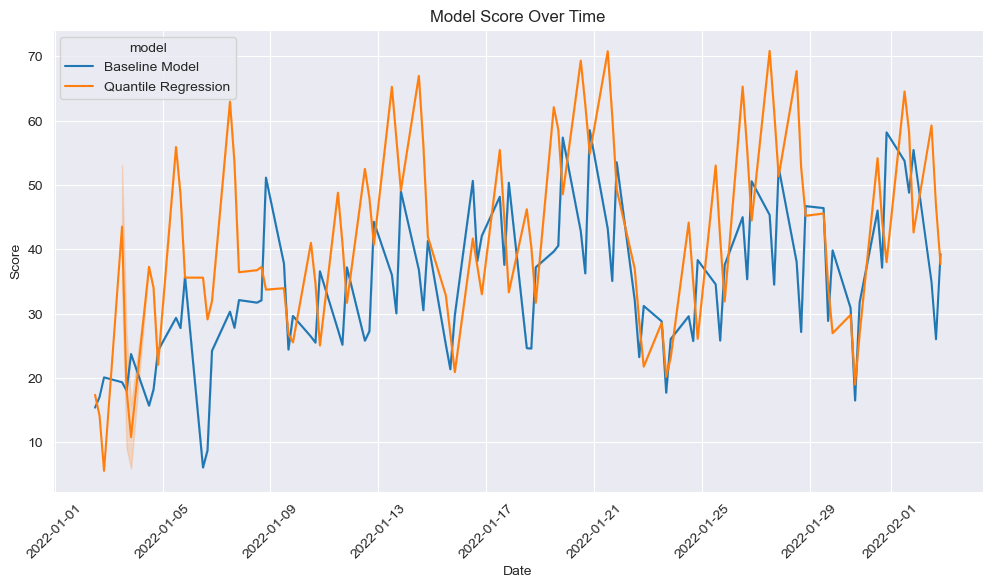

In [49]:
baseline_model = {
    'name': 'Baseline Model',
    'function': energy_baseline.energy_baseline
}
quantile_model = {
    'name': 'Quantile Regression',
    'function': energy_quantile_regression.energy_quantile_regression
}

start_date = '2022-01-01'
end_date = '2022-01-31'

evaluation_model1, evaluation_model2, grouped_scores = evaluate_model.evaluate(baseline_model, quantile_model, energydata ,start_date, end_date, horizon_format="hours")

In [52]:
evaluation_model1.score.sum()

6359.8834546875005

In [53]:
evaluation_model2.score.sum()

7822.532908961806

In [54]:
df_sub = merge_submissions.merge(reg, df_dax)

  forecast_date      target  horizon     q0.025      q0.25       q0.5  \
0    2023-12-13         DAX    1 day    -2.8067  -0.524041    0.05462   
1    2023-12-13         DAX    2 day  -3.333108  -0.767981   0.018341   
2    2023-12-13         DAX    5 day  -3.791888  -0.664872   0.227352   
3    2023-12-13         DAX    6 day  -3.614934  -0.035148   0.957114   
4    2023-12-13         DAX    7 day    -3.9585  -0.240199   0.835132   
0    2023-12-13      energy  36 hour  41.087301  49.087001  53.268227   
1    2023-12-13      energy  40 hour  53.080017  62.568796  66.366188   
2    2023-12-13      energy  44 hour  50.483452  58.319401  61.311589   
3    2023-12-13      energy  60 hour  40.090986  47.214877    51.4291   
4    2023-12-13      energy  64 hour  52.083702  60.696672   64.52706   
5    2023-12-13      energy  68 hour  49.487138  56.447277  59.472462   
0    2023-12-13  infections   0 week         NA         NA         NA   
1    2023-12-13  infections   1 week         NA    

In [55]:
df_sub

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975
0,2023-12-13,DAX,1 day,-2.8067,-0.524041,0.05462,0.616425,2.212933
1,2023-12-13,DAX,2 day,-3.333108,-0.767981,0.018341,0.710874,2.745716
2,2023-12-13,DAX,5 day,-3.791888,-0.664872,0.227352,1.006379,3.394728
3,2023-12-13,DAX,6 day,-3.614934,-0.035148,0.957114,1.845962,4.496132
4,2023-12-13,DAX,7 day,-3.9585,-0.240199,0.835132,1.722963,4.814707
0,2023-12-13,energy,36 hour,41.087301,49.087001,53.268227,56.015033,58.495173
1,2023-12-13,energy,40 hour,53.080017,62.568796,66.366188,70.875633,75.285596
2,2023-12-13,energy,44 hour,50.483452,58.319401,61.311589,64.262536,67.565558
3,2023-12-13,energy,60 hour,40.090986,47.214877,51.4291,54.601382,57.718923
4,2023-12-13,energy,64 hour,52.083702,60.696672,64.52706,69.461982,74.509346


In [56]:
df_sub.to_csv('../../forecasts/20231213_JonSnow.csv',index=False)